In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from pylab import rcParams
import numpy as np

In C:\Users\Williams\.conda\envs\joseph\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Williams\.conda\envs\joseph\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Williams\.conda\envs\joseph\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Williams\.conda\envs\joseph\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Williams\.conda\envs\joseph\lib\

In [114]:
df = pd.read_csv('household_power_consumption.txt', sep=';', parse_dates={'Dates':['Date', 'Time']}, na_values = '?', dtype = 'float', index_col='Dates')

In [116]:
columns =['Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3']

In [115]:
for column in columns:
    df[column]= df[column].fillna(df[column].mean())

In [117]:
# df.set_index('Dates', inplace=True)
new_df = df.resample('D').sum()

In [111]:
df

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,
2006-12-16,2020-10-13 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16,2020-10-13 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16,2020-10-13 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16,2020-10-13 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16,2020-10-13 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...
2010-11-26,2020-10-13 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26,2020-10-13 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26,2020-10-13 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


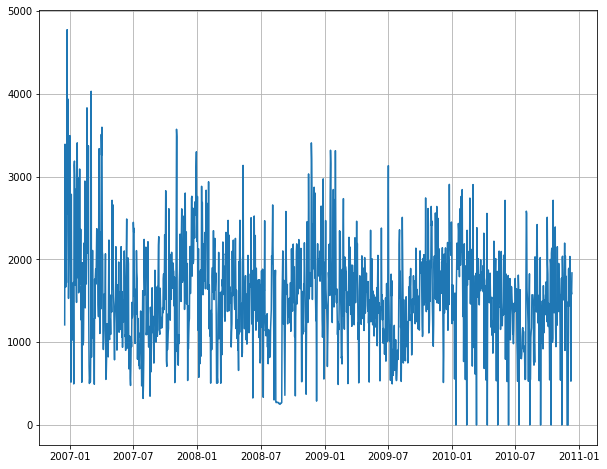

In [119]:
rcParams['figure.figsize'] = 10, 8
plt.plot(new_df.index, new_df['Global_active_power'])
plt.grid()

In [120]:
new_df.corr()['Global_active_power']['Global_reactive_power']

0.12708121315608978

#### The Pearson@s correlation for GLOBAL ACTIVE POWER and GLOBAL REACTIVE POWER is 0.13 which wasnt in the option

In [121]:
new_df.corr()['Voltage']['Global_intensity']

0.2692294770108169

#### Pearson's correlation between VOLTAGE and GLOBAL_INTENSITY is 0.27 which wasnt given in the options

In [310]:
from scipy import stats

In [122]:
test = new_df[-365:]
train = new_df[:-365]

In [123]:
train

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Dates,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...
2009-12-07,513.478,191.480,348919.11,2305.4,0.0,589.0,4060.0
2009-12-08,824.436,272.552,348203.92,3678.2,912.0,689.0,4991.0
2009-12-09,2064.358,325.196,346618.15,8845.2,9583.0,1202.0,12601.0


In [124]:
test

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Dates,,,,,,,
2009-12-12,1816.380000,248.730000,352712.090000,7576.200000,1087.000000,4120.000000,8198.000000
2009-12-13,2138.814000,222.190000,352076.540000,8877.400000,3984.000000,417.000000,13178.000000
2009-12-14,1794.862000,151.982000,354454.290000,7376.000000,1090.000000,2280.000000,10742.000000
2009-12-15,1940.116000,162.344000,354302.180000,7941.000000,1111.000000,392.000000,14084.000000
2009-12-16,1394.874000,154.430000,355990.850000,5750.400000,1143.000000,2943.000000,8104.000000
2009-12-17,1717.182000,148.970000,355527.550000,6971.400000,0.000000,308.000000,14395.000000
2009-12-18,1744.706000,160.418000,355096.590000,7154.400000,1195.000000,304.000000,11466.000000
2009-12-19,2204.334000,137.608000,354145.740000,8989.800000,1165.000000,2662.000000,13681.000000
2009-12-20,1144.166000,122.100000,356306.410000,4672.000000,1237.000000,313.000000,7795.000000


In [125]:
test_g = test[['Global_active_power']].reset_index()
train_g = train[['Global_active_power']].reset_index()

In [126]:
test_g = test_g.rename(columns = {'Dates':'ds', 'Global_active_power':'y'})
train_g = train_g.rename(columns = {'Dates':'ds', 'Global_active_power':'y'})

In [127]:
train_g

,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748
...,...,...
1087,2009-12-07,513.478
1088,2009-12-08,824.436
1089,2009-12-09,2064.358
1090,2009-12-10,1351.604


In [128]:
model = Prophet()

In [129]:
# fitting a model using just global_active_power
model.fit(train_g)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [130]:
future = model.make_future_dataframe(periods = 365, freq='D', include_history = False)
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-12-12,1531.015970,1236.399069,2663.460329,1531.015970,1531.015970,447.752971,447.752971,447.752971,149.612357,149.612357,149.612357,298.140613,298.140613,298.140613,0.0,0.0,0.0,1978.768940
1,2009-12-13,1530.964057,1330.132870,2725.511855,1530.964057,1530.964057,446.240858,446.240858,446.240858,138.201997,138.201997,138.201997,308.038861,308.038861,308.038861,0.0,0.0,0.0,1977.204915
2,2009-12-14,1530.912143,1028.308427,2450.076479,1530.912143,1530.912143,218.295025,218.295025,218.295025,-101.328590,-101.328590,-101.328590,319.623615,319.623615,319.623615,0.0,0.0,0.0,1749.207168
3,2009-12-15,1530.860230,1158.170727,2554.416465,1530.860230,1530.860230,334.319970,334.319970,334.319970,1.644305,1.644305,1.644305,332.675665,332.675665,332.675665,0.0,0.0,0.0,1865.180200
4,2009-12-16,1530.808317,1088.179442,2571.758387,1530.808317,1530.808317,309.796089,309.796089,309.796089,-37.132351,-37.132351,-37.132351,346.928440,346.928440,346.928440,0.0,0.0,0.0,1840.604406


In [134]:
new_test_g = test_g['y'].replace(0, np.nan).fillna(method='ffill') 

In [137]:
np.mean(abs(new_test_g - forecast['yhat'])/new_test_g) * 100

28.01184289491197

#### The MAPE for the forecast using just global_active_power is 28.01

In [26]:
from sklearn.metrics import mean_squared_error

In [138]:

np.sqrt(mean_squared_error(new_test_g, forecast['yhat']))

470.0809861056568

#### The RMSE for the forecast using just global_active_power is 470.08

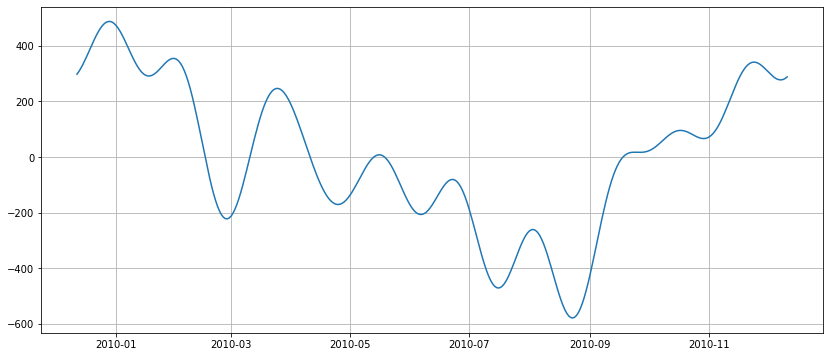

In [46]:

rcParams['figure.figsize'] = 14, 6
plt.plot(forecast['ds'], forecast['yearly'])
plt.grid()

In [139]:
df_prof = new_df.reset_index()

In [48]:
df_prof.columns

Index(['Dates', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [140]:
df_prof= df_prof.rename(columns = {'Dates': 'ds', 
                                   'Global_active_power':'y', 
                                   'Global_reactive_power': 'add1',
                                   'Voltage':'add2', 
                                   'Global_intensity':'add3', 
                                   'Sub_metering_1':'add4', 
                                   'Sub_metering_2':'add5',  'Sub_metering_3':'add6'})

In [103]:
df_prof.tail(40)

,ds,y,add1,add2,add3,add4,add5,add6
1417,2010-11-02,1369.768000,124.150000,352097.830000,5626.600000,0.000000,330.000000,9916.000000
1418,2010-11-03,1951.090000,152.388000,349461.280000,8120.800000,2071.000000,320.000000,15706.000000
1419,2010-11-04,1603.901615,175.131714,347748.219858,6819.627759,5500.121923,555.298520,8856.458447
1420,2010-11-05,1571.368000,152.300000,349031.630000,6543.000000,1156.000000,345.000000,11418.000000
1421,2010-11-06,1470.672000,218.570000,347692.740000,6354.000000,3439.000000,468.000000,11728.000000
1422,2010-11-07,1193.572000,302.624000,345274.490000,5253.200000,848.000000,594.000000,7781.000000
1423,2010-11-08,542.002000,176.064000,346381.730000,2407.200000,0.000000,542.000000,4118.000000
1424,2010-11-09,1463.310000,235.630000,348005.880000,6209.200000,930.000000,1427.000000,8996.000000
1425,2010-11-10,1622.590000,268.530000,345493.720000,6941.400000,1007.000000,5006.000000,8734.000000
1426,2010-11-11,1773.592000,152.188000,343769.340000,7568.000000,3424.000000,2216.000000,6259.000000


In [141]:
model2 = Prophet(daily_seasonality = True)

In [142]:
train_p = df_prof[:-365]
test_p = df_prof[-365:]

In [143]:
model2.fit(train_p)

In [144]:
future_multi = model2.make_future_dataframe(periods = 365, freq='D', include_history = False)
forecast_multi = model2.predict(future_multi)
forecast_multi.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-12-12,1168.101868,1285.176684,2733.943109,1168.101868,1168.101868,814.841335,814.841335,814.841335,366.960332,...,149.580113,149.580113,149.580113,298.300891,298.300891,298.300891,0.0,0.0,0.0,1982.943203
1,2009-12-13,1168.067603,1305.097830,2728.961003,1168.067603,1168.067603,813.151626,813.151626,813.151626,366.960332,...,138.179107,138.179107,138.179107,308.012188,308.012188,308.012188,0.0,0.0,0.0,1981.219230
2,2009-12-14,1168.033339,1040.636498,2500.628740,1168.033339,1168.033339,585.028225,585.028225,585.028225,366.960332,...,-101.333893,-101.333893,-101.333893,319.401786,319.401786,319.401786,0.0,0.0,0.0,1753.061564
3,2009-12-15,1167.999075,1221.123228,2590.115951,1167.999075,1167.999075,700.857251,700.857251,700.857251,366.960332,...,1.644246,1.644246,1.644246,332.252673,332.252673,332.252673,0.0,0.0,0.0,1868.856326
4,2009-12-16,1167.964811,1149.924263,2620.727270,1167.964811,1167.964811,676.138904,676.138904,676.138904,366.960332,...,-37.122034,-37.122034,-37.122034,346.300607,346.300607,346.300607,0.0,0.0,0.0,1844.103715


In [149]:
new_test_p = test_p['y'].replace(0, np.nan).fillna(method='ffill')
new_test_p.index = list(range(365))

In [150]:
np.mean(abs(new_test_p - forecast_multi['yhat'])/new_test_p) * 100

28.127606993312522

#### The MAPE for the forecast using the global_active_power and other columns as regressors  is 28.13

In [151]:
np.sqrt(mean_squared_error(new_test_p, forecast_multi['yhat']))

469.59698520662306

#### The RMSE for the forecast using the global_active_power and other columns as regressors is 470.08

In [283]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

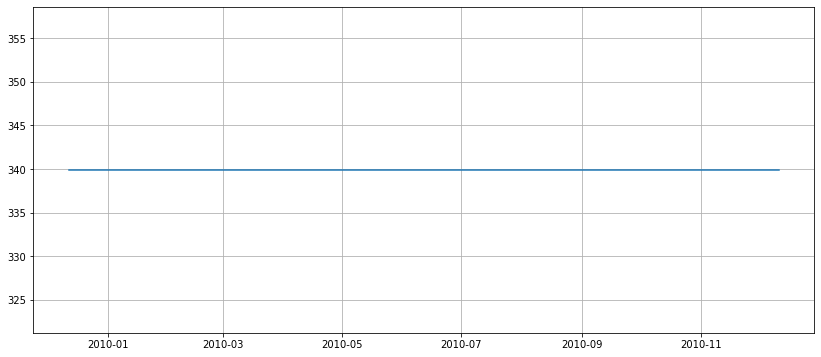

In [284]:
rcParams['figure.figsize'] = 14, 6
plt.plot(forecast['ds'], forecast['daily'])
plt.grid()

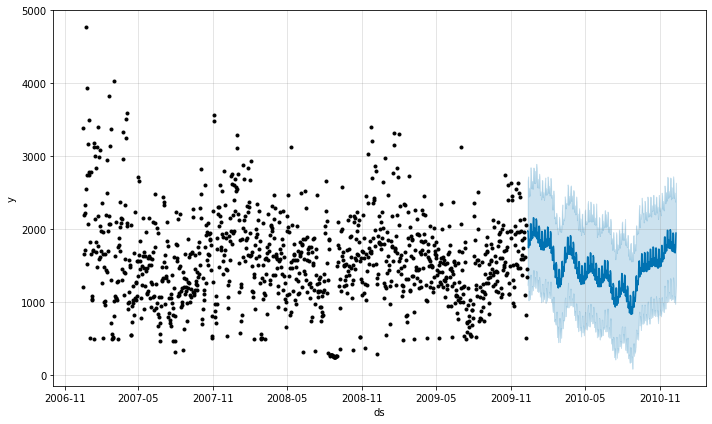

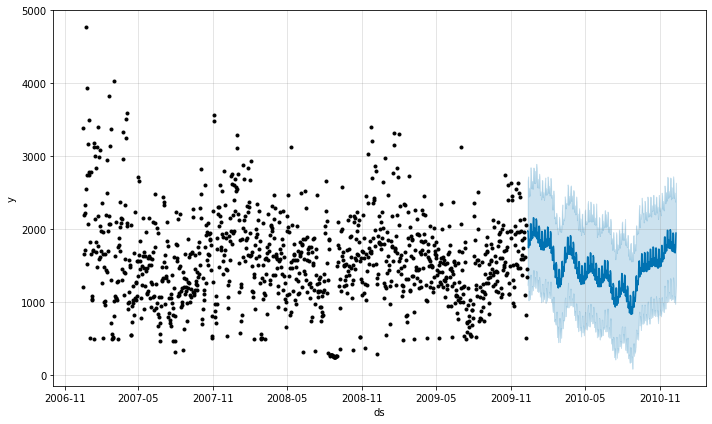

In [153]:
model.plot(forecast)

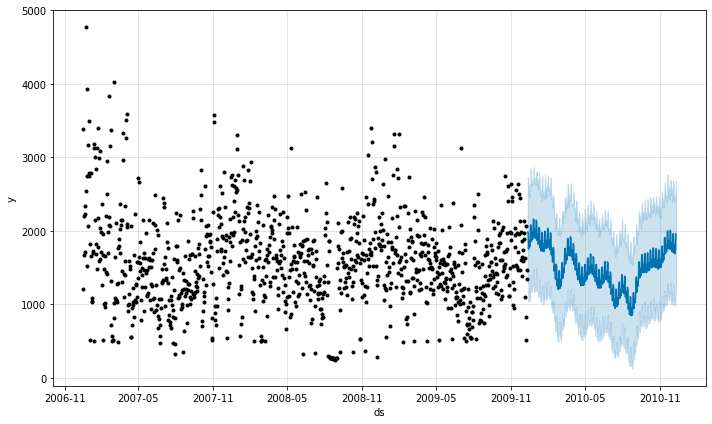

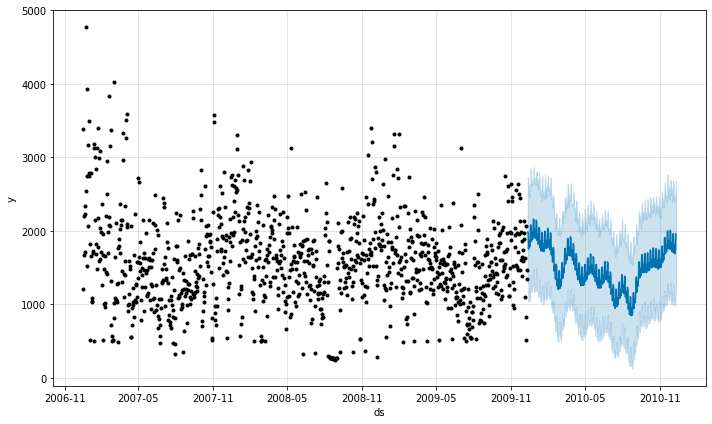

In [152]:
model2.plot(forecast_multi)